# 서울시 CCTV 현황 데이터 분석

In [229]:
import pandas as pd
import numpy as np

In [230]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
mpl.rcParams['axes.unicode_minus'] = False
mpl.rc('font', family = 'Malgun Gothic')
font1 = {'size': 18, 'color': 'green'}
plt.rcParams['figure.figsize'] = (12, 6)

In [231]:
pp = pd.read_csv('report.txt', sep = "\t", engine = 'python', encoding = 'utf-8', thousands=',', header = 0)
pp.head(10)

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2020.1/4,합계,4354006,10013781,4874995,5138786,9733655,4742217,4991438,280126,132778,147348,2.24,1518239
3,2020.1/4,종로구,74151,161984,78271,83713,151217,73704,77513,10767,4567,6200,2.04,28073
4,2020.1/4,중구,63045,136469,66769,69700,126175,61839,64336,10294,4930,5364,2,23794
5,2020.1/4,용산구,110895,246165,119961,126204,229579,110667,118912,16586,9294,7292,2.07,39439
6,2020.1/4,성동구,135643,307193,149891,157302,299042,146300,152742,8151,3591,4560,2.2,44728
7,2020.1/4,광진구,165287,365990,176226,189764,350417,169568,180849,15573,6658,8915,2.12,48989
8,2020.1/4,동대문구,165279,362793,178202,184591,346156,171896,174260,16637,6306,10331,2.09,60367
9,2020.1/4,중랑구,182220,400678,198122,202556,395619,196076,199543,5059,2046,3013,2.17,66764


In [232]:
pp = pd.read_csv('report.txt', sep = "\t", engine = 'python', encoding = 'utf-8', thousands=',', skiprows = 4,
                 usecols = [1, 3, 6, 9, 13], names = ['자치구', '인구수', '내국인', '외국인', '고령자'])
pp.head(10)

,자치구,인구수,내국인,외국인,고령자
0,종로구,161984,151217,10767,28073
1,중구,136469,126175,10294,23794
2,용산구,246165,229579,16586,39439
3,성동구,307193,299042,8151,44728
4,광진구,365990,350417,15573,48989
5,동대문구,362793,346156,16637,60367
6,중랑구,400678,395619,5059,66764
7,성북구,454532,442494,12038,72172
8,강북구,316750,312985,3765,61660
9,도봉구,333495,331238,2257,60023


### 3. 외국인 비율과 고령자 비율을 추가한다.

In [233]:
pp['외국인비율'] = pp['외국인'] / pp['인구수'] * 100
pp['고령자비율'] = pp['고령자'] / pp['인구수'] * 100
pp.head()

,자치구,인구수,내국인,외국인,고령자,외국인비율,고령자비율
0,종로구,161984,151217,10767,28073,6.646953,17.330724
1,중구,136469,126175,10294,23794,7.543105,17.435462
2,용산구,246165,229579,16586,39439,6.737757,16.021368
3,성동구,307193,299042,8151,44728,2.653381,14.560228
4,광진구,365990,350417,15573,48989,4.255034,13.385338


### 4. 서울시 자치구 CCTV 설치 현황

In [234]:
cc = pd.read_excel('서울시CCTV.xlsx')
cc.head()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671


In [235]:
cc['기관명'].unique()

array(['강 남 구', '강 동 구', '강 북 구', '강 서 구', '관 악 구', '광 진 구', '구 로 구',
       '금 천 구', '노 원 구', '도 봉 구', '동대문구', '동 작 구', '마 포 구', '서대문구',
       '서 초 구', '성 동 구', '성 북 구', '송 파 구', '양 천 구', '영등포구', '용 산 구',
       '은 평 구', '종 로 구', '중     구', '중 랑 구'], dtype=object)

In [236]:
# cc['기관명'] = ['강남구','강동구','강북구','강서구','관악구','광진구','구로구',
#                 '금천구','노원구','도봉구','동대문구','동작구','마포구','서대문구',
#                 '서초구','성동구','성북구','송파구','양천구','영등포구','용산구',
#                 '은평구','종로구','중구','중랑구']
cc['기관명'] = [x.replace(' ', '') for x in cc['기관명'].unique()]
cc['기관명'].unique()

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object)

In [237]:
cc.rename(columns = {'기관명': '자치구'}, inplace=True)
cc.head()

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


In [238]:
cc[['2011년 이전', '2012년', '2013년']] = cc[['2011년 이전', '2012년', '2013년']].fillna(0).astype(int)
cc

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944,195,316,430,546,765,577,448
1,강동구,1879,303,387,134,59,144,194,273,385
2,강북구,1265,243,88,141,74,145,254,1,319
3,강서구,1617,219,155,118,230,187,190,264,254
4,관악구,3985,430,56,419,487,609,619,694,671
5,광진구,1581,470,42,83,87,64,21,468,346
6,구로구,3227,852,219,349,187,268,326,540,486
7,금천구,1634,27,17,242,101,382,136,199,530
8,노원구,1906,481,117,203,80,461,298,110,156
9,도봉구,858,197,66,8,185,59,155,117,71


In [239]:
cc['2015년이전'] = cc[['2011년 이전', '2012년', '2013년', '2014년', '2015년']].sum(axis = 1)
cc.head()

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2015년이전
0,강남구,5221,1944,195,316,430,546,765,577,448,3431
1,강동구,1879,303,387,134,59,144,194,273,385,1027
2,강북구,1265,243,88,141,74,145,254,1,319,691
3,강서구,1617,219,155,118,230,187,190,264,254,909
4,관악구,3985,430,56,419,487,609,619,694,671,2001


In [240]:
cc['최근3개년'] = cc[['2016년', '2017년', '2018년']].sum(axis=1)
cc['최근증가율'] = (cc['최근3개년'] - cc['2015년이전']) / cc['2015년이전'] * 100
cc.head()

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2015년이전,최근3개년,최근증가율
0,강남구,5221,1944,195,316,430,546,765,577,448,3431,1790,-47.828621
1,강동구,1879,303,387,134,59,144,194,273,385,1027,852,-17.039922
2,강북구,1265,243,88,141,74,145,254,1,319,691,574,-16.931983
3,강서구,1617,219,155,118,230,187,190,264,254,909,708,-22.112211
4,관악구,3985,430,56,419,487,609,619,694,671,2001,1984,-0.849575


### 7. '자치구', '소계', '최근 증가율' 컬럼을 제외하고 모두 제거

In [241]:
cc.drop(['2011년 이전', '2012년', '2013년', '2014년', '2015년', '2016년', '2017년', '2018년', '2015년이전', '최근3개년'],
        axis = 1, inplace = True)
cc.head()

,자치구,소계,최근증가율
0,강남구,5221,-47.828621
1,강동구,1879,-17.039922
2,강북구,1265,-16.931983
3,강서구,1617,-22.112211
4,관악구,3985,-0.849575


### 8. 서울시 인구와 cctv 데이터 합치기

In [242]:
pp.head()

,자치구,인구수,내국인,외국인,고령자,외국인비율,고령자비율
0,종로구,161984,151217,10767,28073,6.646953,17.330724
1,중구,136469,126175,10294,23794,7.543105,17.435462
2,용산구,246165,229579,16586,39439,6.737757,16.021368
3,성동구,307193,299042,8151,44728,2.653381,14.560228
4,광진구,365990,350417,15573,48989,4.255034,13.385338


In [243]:
df = pd.merge(cc, pp, on = '자치구')
df.head()

,자치구,소계,최근증가율,인구수,내국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,-47.828621,549898,544804,5094,72602,0.926354,13.202812
1,강동구,1879,-17.039922,457042,452646,4396,66401,0.961837,14.528424
2,강북구,1265,-16.931983,316750,312985,3765,61660,1.188635,19.466456
3,강서구,1617,-22.112211,595703,589302,6401,85992,1.074529,14.435381
4,관악구,3985,-0.849575,516662,499374,17288,76664,3.346095,14.838328


In [244]:
df.set_index('자치구', inplace = True)
df.head()

,소계,최근증가율,인구수,내국인,외국인,고령자,외국인비율,고령자비율
자치구,,,,,,,,
강남구,5221,-47.828621,549898,544804,5094,72602,0.926354,13.202812
강동구,1879,-17.039922,457042,452646,4396,66401,0.961837,14.528424
강북구,1265,-16.931983,316750,312985,3765,61660,1.188635,19.466456
강서구,1617,-22.112211,595703,589302,6401,85992,1.074529,14.435381
관악구,3985,-0.849575,516662,499374,17288,76664,3.346095,14.838328


In [245]:
df = df.sort_values(by = '소계', ascending = False)
df.head()

,소계,최근증가율,인구수,내국인,외국인,고령자,외국인비율,고령자비율
자치구,,,,,,,,
강남구,5221,-47.828621,549898,544804,5094,72602,0.926354,13.202812
관악구,3985,-0.849575,516662,499374,17288,76664,3.346095,14.838328
구로구,3227,-27.893333,438308,405837,32471,67432,7.408261,15.384615
성북구,3003,-21.991701,454532,442494,12038,72172,2.648438,15.878310
은평구,2962,-56.908213,482509,478019,4490,82245,0.930553,17.045278


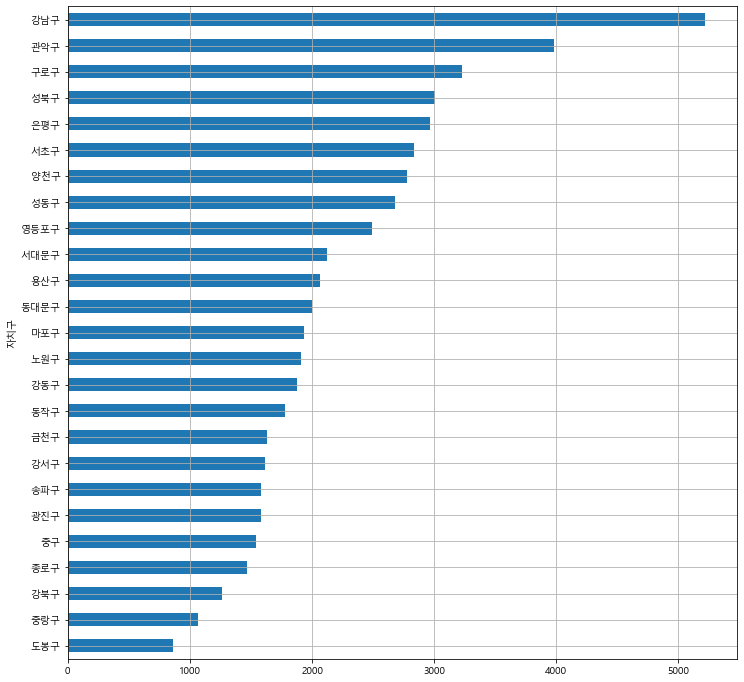

In [246]:
df['소계'].sort_values().plot(kind = 'barh', grid = True, figsize = (12, 12))

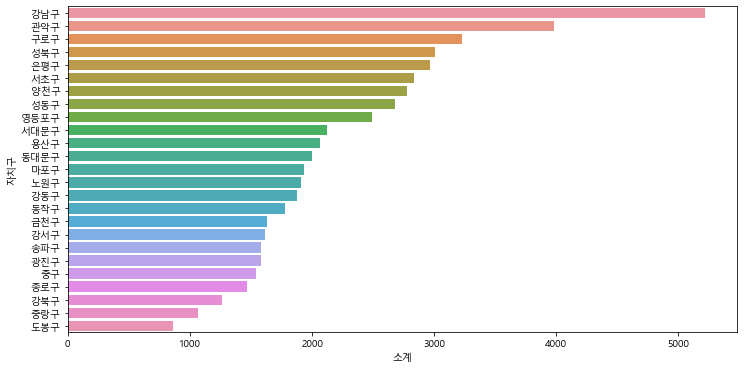

In [247]:
sns.barplot(x = '소계', y = df.index, data = df)

In [248]:
df['인당개수'] = df['소계'] / df['인구수']
df.head()

,소계,최근증가율,인구수,내국인,외국인,고령자,외국인비율,고령자비율,인당개수
자치구,,,,,,,,,
강남구,5221,-47.828621,549898,544804,5094,72602,0.926354,13.202812,0.009494
관악구,3985,-0.849575,516662,499374,17288,76664,3.346095,14.838328,0.007713
구로구,3227,-27.893333,438308,405837,32471,67432,7.408261,15.384615,0.007362
성북구,3003,-21.991701,454532,442494,12038,72172,2.648438,15.878310,0.006607
은평구,2962,-56.908213,482509,478019,4490,82245,0.930553,17.045278,0.006139


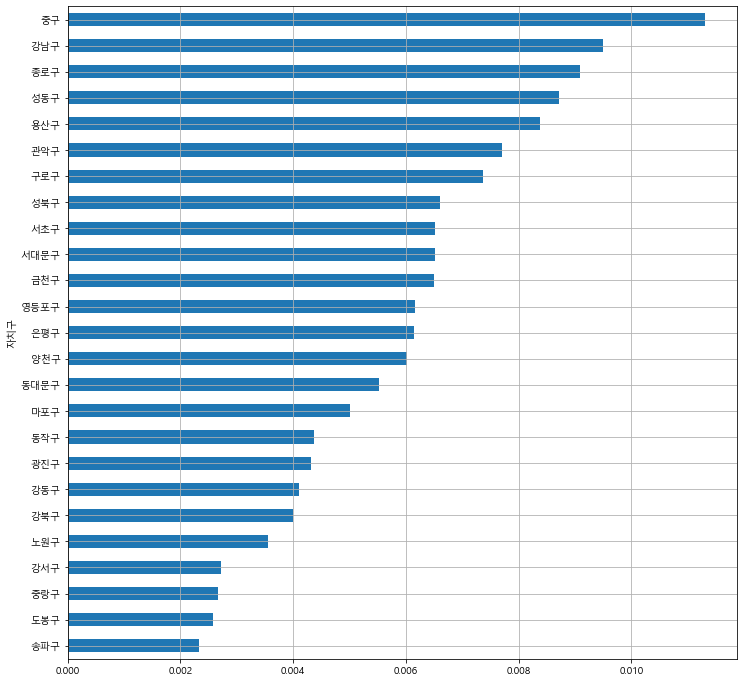

In [249]:
df['인당개수'].sort_values().plot(kind = 'barh', grid = True, figsize = (12, 12))

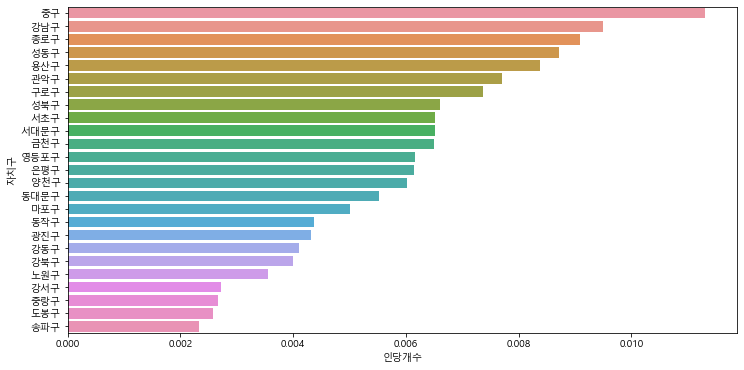

In [250]:
df = df.sort_values(by = '인당개수', ascending = False)
sns.barplot(x = df.인당개수, y = df.index, data = df)

### - 인구수와 cctv 대수의 산점도

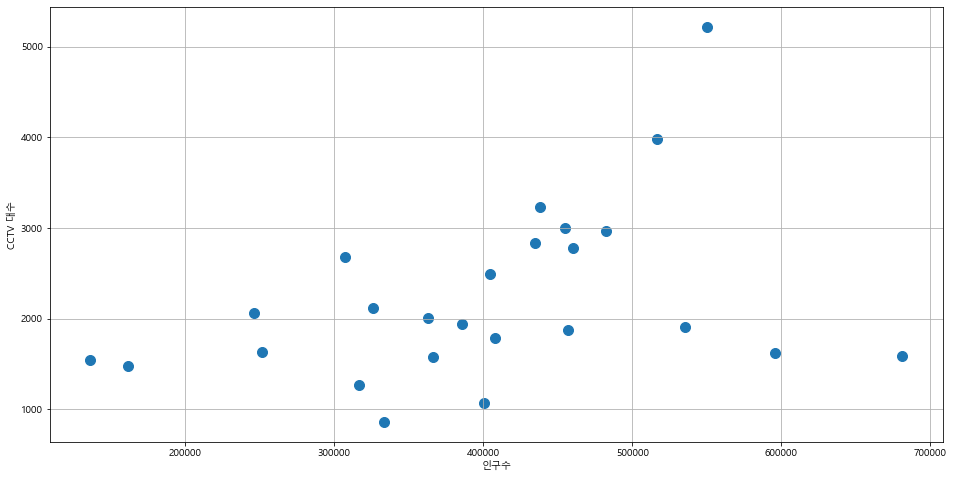

In [263]:
plt.figure(figsize = (16, 8))
plt.scatter(df['인구수'], df['소계'], s = 100)
plt.xlabel('인구수')
plt.ylabel('CCTV 대수')
plt.grid()

### - 인구수와 CCTV 대수의 산점도 및 회귀선

In [307]:
fp1 = np.polyfit(df['인구수'], df['소계'], 1)
fp1

array([2.88522756e-03, 1.06403852e+03])

In [320]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 101)

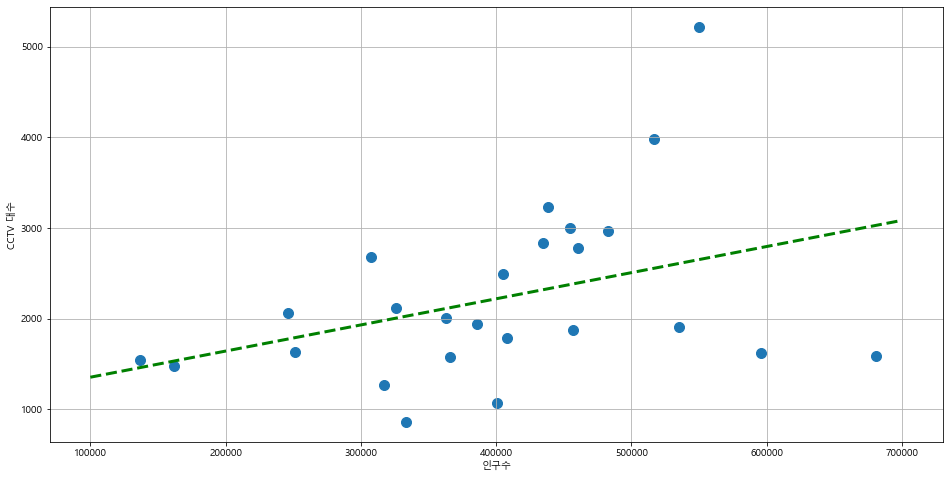

In [321]:
plt.figure(figsize = (16, 8))
plt.scatter(df['인구수'], df['소계'], s = 100)
plt.plot(fx, f1(fx), ls = 'dashed', lw = 3, color = 'g')
plt.xlabel('인구수')
plt.ylabel('CCTV 대수')
plt.grid()

#### - 인구수와 CCTV 대수의 산점도, 회귀선 및 자치구명

In [310]:
df.head()

,소계,최근증가율,인구수,내국인,외국인,고령자,외국인비율,고령자비율,인당개수
자치구,,,,,,,,,
중구,1544,45.468998,136469,126175,10294,23794,7.543105,17.435462,0.011314
강남구,5221,-47.828621,549898,544804,5094,72602,0.926354,13.202812,0.009494
종로구,1471,-43.676939,161984,151217,10767,28073,6.646953,17.330724,0.009081
성동구,2679,14.148681,307193,299042,8151,44728,2.653381,14.560228,0.008721
용산구,2063,-87.941336,246165,229579,16586,39439,6.737757,16.021368,0.008381


In [311]:
df['오차'] = np.abs(df['소계'] - f1(df['인구수']))
df.head()

,소계,최근증가율,인구수,내국인,외국인,고령자,외국인비율,고령자비율,인당개수,오차
자치구,,,,,,,,,,
중구,1544,45.468998,136469,126175,10294,23794,7.543105,17.435462,0.011314,86.217357
강남구,5221,-47.828621,549898,544804,5094,72602,0.926354,13.202812,0.009494,2570.380612
종로구,1471,-43.676939,161984,151217,10767,28073,6.646953,17.330724,0.009081,60.399224
성동구,2679,14.148681,307193,299042,8151,44728,2.653381,14.560228,0.008721,728.639767
용산구,2063,-87.941336,246165,229579,16586,39439,6.737757,16.021368,0.008381,288.719435


In [312]:
df_sort = df.sort_values(by = '오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구수,내국인,외국인,고령자,외국인비율,고령자비율,인당개수,오차
자치구,,,,,,,,,,
강남구,5221,-47.828621,549898,544804,5094,72602,0.926354,13.202812,0.009494,2570.380612
송파구,1586,-37.166324,680883,674095,6788,89539,0.996941,13.150424,0.002329,1442.540920
관악구,3985,-0.849575,516662,499374,17288,76664,3.346095,14.838328,0.007713,1430.274035
도봉구,858,-33.398058,333495,331238,2257,60023,0.676772,17.998171,0.002573,1168.247488
강서구,1617,-22.112211,595703,589302,6401,85992,1.074529,14.435381,0.002714,1165.777237


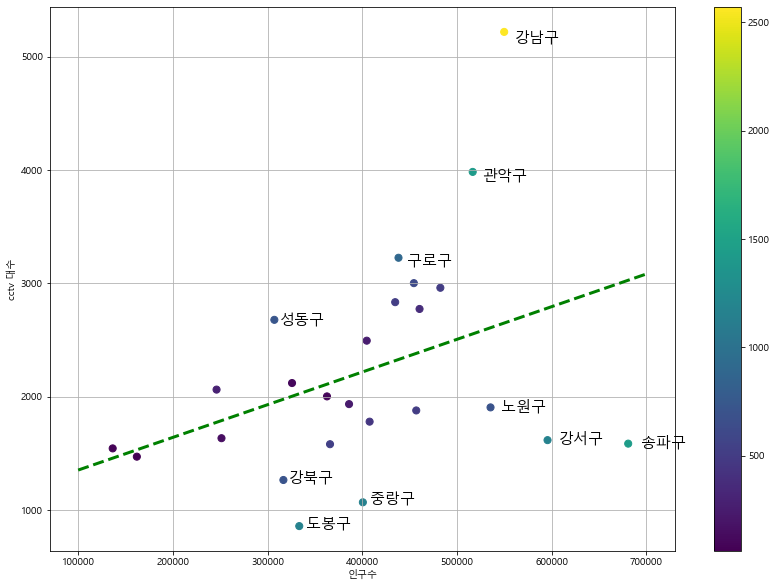

In [322]:
plt.figure(figsize = (14, 10))
plt.scatter(df['인구수'], df['소계'], c = df['오차'], s = 50)
plt.plot(fx, f1(fx), ls = 'dashed', lw = 3, color = 'g')
for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98,
             df_sort.index[n], fontsize = 15)
plt.xlabel('인구수')
plt.ylabel('cctv 대수')
plt.colorbar()
plt.grid()

In [327]:
fp2 = np.polyfit(df.고령자비율, df.인당개수, 1)
fx = np.linspace(13, 19, 10)

In [328]:
f2 = np.poly1d(fp2)

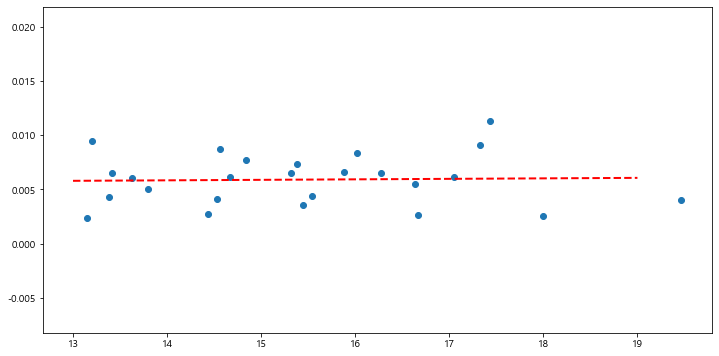

In [332]:
plt.scatter(df.고령자비율, df.인당개수)
plt.plot(fx, f2(fx), ls = '--', lw = 2, color = 'r')

In [334]:
fp3 = np.polyfit(df.외국인비율, df.인당개수, 1)
fx = np.linspace(0, 9, 10)

In [335]:
f3 = np.poly1d(fp3)

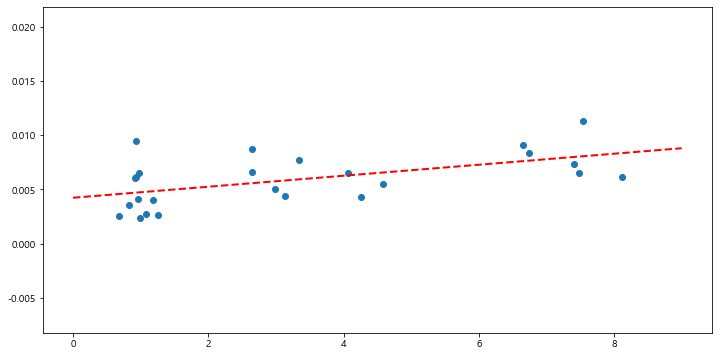

In [338]:
plt.scatter(df.외국인비율, df.인당개수)
plt.plot(fx, f3(fx), ls = '--', lw = '2', color = 'r')